# Week 12: Unsupervised Learning and NLP
This week, you learned about two data science techniques for handling data: unsupervised learning and NLP. With this homework assignment, you'll get the opportunity to put the two together.

### About the Dataset
The dataset includes headlines from various news publications. Your goal is to determine what groups of headlines exist and what the general themes of those groups are.

In [11]:
##TODO: load in the dataset
import pandas as pd
headlines = pd.read_csv("headline.csv")

In [12]:
headlines.head()

,Unnamed: 0,headline
0,0,former versace store clerk sues over secret 'b...
1,1,the 'roseanne' revival catches up to our thorn...
2,2,mom starting to fear son's web series closest ...
3,3,"boehner just wants wife to listen, not come up..."
4,4,j.k. rowling wishes snape happy birthday in th...


In [26]:
len(headlines)

26709

### Prepare the text for analysis

In [18]:
##TODO: Create vectorizor
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [19]:
##TODO: Use vectorizer to transform the text data
headlines_only = headlines['headline'].to_list()
vectorized_documents = vectorizer.fit_transform(headlines_only)

### Use Dimensionality Reduction Techniques
In order to better understand and visualize the clusters, it'll likely be helpful for us to reduce the sparse vectors produced by TF-IDF. We'll use those techniques now.

In [20]:
##TODO: Use PCA to reduce the dimensionality of the data to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

### Cluster the Text Data with K-Means
Now, let's figure out which headlines are similar to others.

#### Determine Number of Clusters
##### Elbow Sum-of-Squares Method
The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned.

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

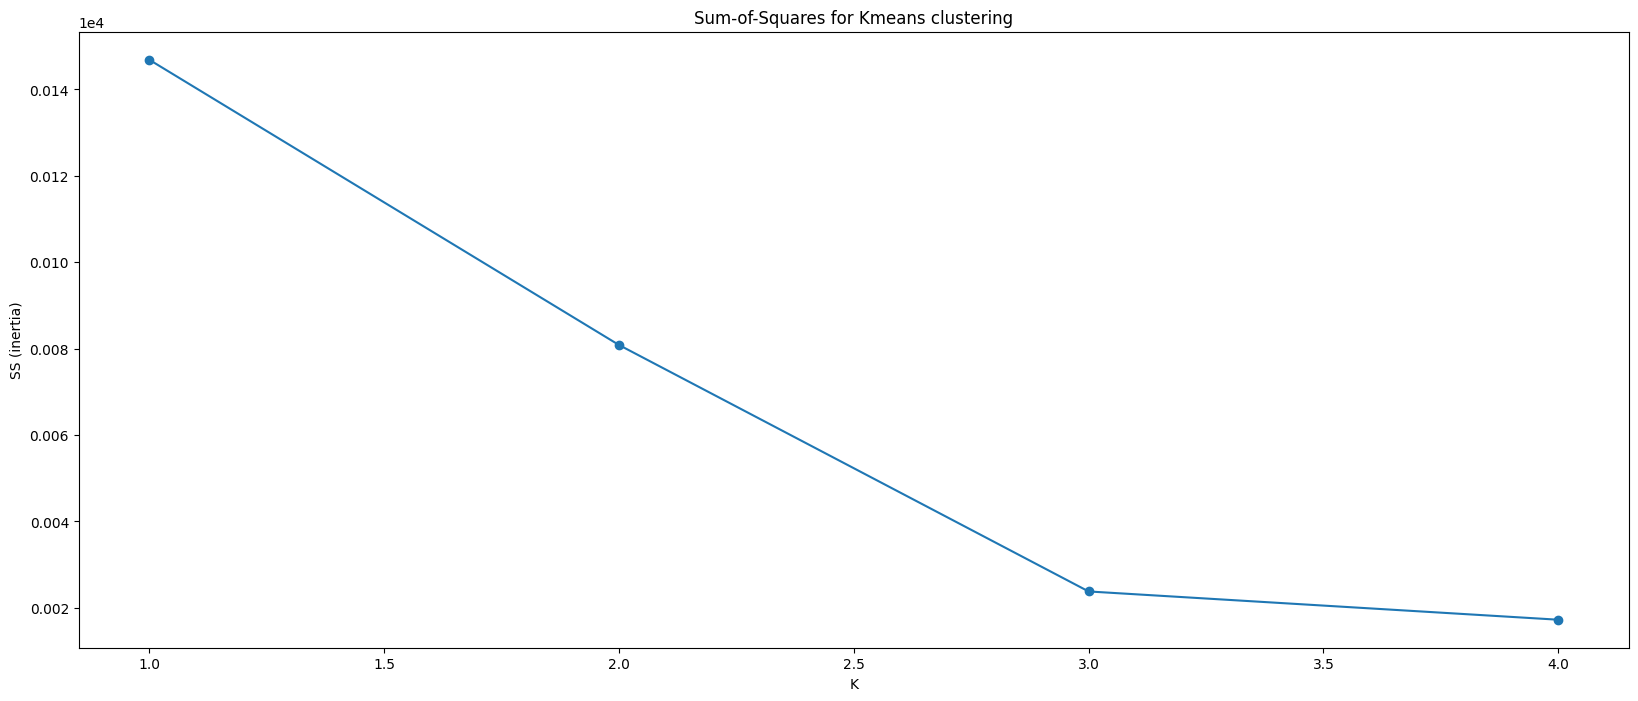

In [22]:
# TODO: Apply Elbow sum of squares method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1,5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(reduced_data)
    sse.append([k, kmeans.inertia_])


# plot cluster number vs inertia
plt.figure(figsize=(20, 8))
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1],'-o')
plt.ticklabel_format(axis="y", style="sci", scilimits=(4,4))
plt.xlabel('K')
plt.ylabel('SS (inertia)')
plt.title('Sum-of-Squares for Kmeans clustering')
plt.show()

##### The Silhouette Method
There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

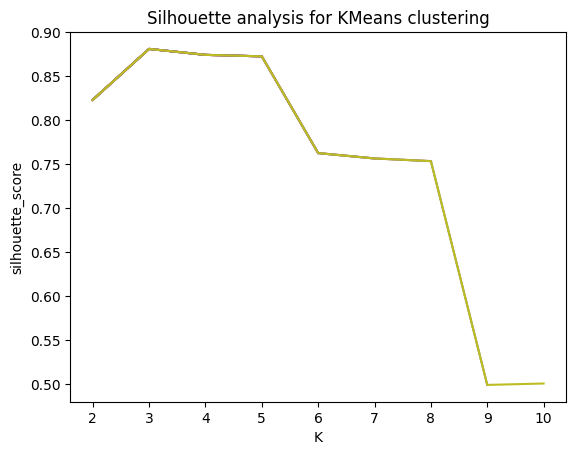

In [24]:
# TODO: apply silhouette method
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(reduced_data)
    score = silhouette_score(reduced_data,kmeans.labels_)
    silhouette.append([k, score])

    plt.plot(pd.DataFrame(silhouette)[0],pd.DataFrame(silhouette)[1])

plt.title('Silhouette analysis for KMeans clustering')
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()

#### Cluster the Text Data and Visualize Results
Now, use the number of clusters that you determined above to cluster the data and then visualize those clusters.

In [25]:
##TODO: Determine cluster for each row of data and add that to the data
label = KMeans(n_clusters=3, random_state=0).fit_predict(reduced_data)
res_PCA = pd.DataFrame(columns=['headline','cluster','PC1','PC2'])
res_PCA['headline'] = headlines['headline']
res_PCA['cluster'] = label
res_PCA['PC1'] = reduced_data[:,0]
res_PCA['PC2'] = reduced_data[:,1]
res_PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,headline,cluster,PC1,PC2
0,former versace store clerk sues over secret 'b...,0,-0.009231,-0.010738
1,the 'roseanne' revival catches up to our thorn...,0,-0.008154,-0.008534
2,mom starting to fear son's web series closest ...,0,-0.014083,-0.013752
3,"boehner just wants wife to listen, not come up...",0,-0.010648,-0.002291
4,j.k. rowling wishes snape happy birthday in th...,0,-0.010222,-0.011709
...,...,...,...,...
26704,american politics in moral free-fall,0,-0.005900,-0.019715
26705,america's best 20 hikes,0,0.000826,-0.009167
26706,reparations and obama,0,-0.000721,-0.016185
26707,israeli ban targeting boycott supporters raise...,0,0.011738,-0.006687


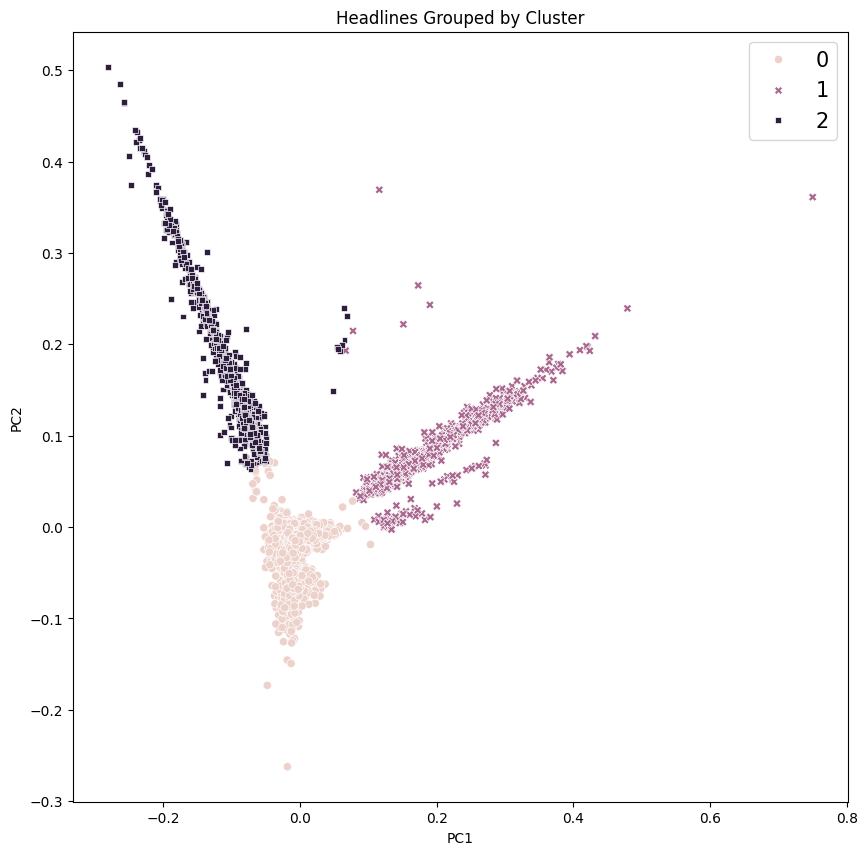

In [28]:
##TODO: visualize the clusters
import seaborn as sns

plt.figure(figsize=(10,10))
plt.title('Headlines Grouped by Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
sns.scatterplot(x='PC1', y='PC2', hue='cluster', style='cluster', data=res_PCA)
plt.legend(loc='upper right', fontsize=15)
plt.show()

### Analyze Results
Now, you'll apply a human label to the types of headlines you've found. You can do this by reading a small sample of the headlines and then determining the pattern you think the algorithm found.

In [29]:
cluster_0 = res_PCA[res_PCA['cluster']== 0]
cluster_1 = res_PCA[res_PCA['cluster']== 1]
cluster_2 = res_PCA[res_PCA['cluster']== 2]

In [30]:
cluster_0

,headline,cluster,PC1,PC2
0,former versace store clerk sues over secret 'b...,0,-0.009231,-0.010738
1,the 'roseanne' revival catches up to our thorn...,0,-0.008154,-0.008534
2,mom starting to fear son's web series closest ...,0,-0.014083,-0.013752
3,"boehner just wants wife to listen, not come up...",0,-0.010648,-0.002291
4,j.k. rowling wishes snape happy birthday in th...,0,-0.010222,-0.011709
...,...,...,...,...
26704,american politics in moral free-fall,0,-0.005900,-0.019715
26705,america's best 20 hikes,0,0.000826,-0.009167
26706,reparations and obama,0,-0.000721,-0.016185
26707,israeli ban targeting boycott supporters raise...,0,0.011738,-0.006687


In [31]:
cluster_1

,headline,cluster,PC1,PC2
9,friday's morning email: inside trump's presser...,1,0.150574,0.064110
12,north korea praises trump and urges us voters ...,1,0.152361,0.054393
21,trump assures nation that decision for syrian ...,1,0.105027,0.046114
53,donald trump heading for a series of wins in t...,1,0.239253,0.110166
54,donald trump wouldn't have had the ready cash ...,1,0.220624,0.107990
...,...,...,...,...
26619,female trump supporters just feel more comfort...,1,0.141353,0.065265
26644,national trust for historic preservation raise...,1,0.111098,0.043922
26652,cnn's erin burnett reports donald trump kissed...,1,0.193498,0.094375
26670,donald trump will not get his son-in-law's new...,1,0.303866,0.140589


In [32]:
cluster_2

,headline,cluster,PC1,PC2
10,airline passengers tackle man who rushes cockp...,2,-0.071217,0.116072
15,nuclear bomb detonates during rehearsal for 's...,2,-0.075051,0.124948
68,area woman said 'sorry' 118 times yesterday,2,-0.074438,0.103526
92,man visiting hometown amazed to find all his c...,2,-0.083452,0.132921
102,jealous gps clearly wants man to back over wife,2,-0.097832,0.162617
...,...,...,...,...
26666,man on horse hates city,2,-0.122385,0.205610
26678,man thinks he managed to masturbate without wa...,2,-0.082087,0.140677
26683,complete idiot forgot to shave area between mo...,2,-0.059304,0.086231
26685,don't nobody wanna hear area man run his mouth,2,-0.151011,0.267050


**TODO:**
Add what you think the clusters could be labeled. **HINT:** Think about how *realistic* (or not) some of these headlines are.


This dataset is actually comprised of both parody headlines and real headlines. There appear to be 3 groups here: real headlines that sound real, fake headlines that sound fake, and headlines that blur the lines between parody and reality.


## Submission

Commit your completed **Week_12_Unsupervised_Learning_NLP_Homework.ipynb** notebook to your personal Github repo you shared with the faculty.